In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\RestaurantVisitors.csv', index_col='date', parse_dates=True)

In [6]:
df.index.freq = 'D'

In [8]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [10]:
df.shape

(517, 8)

In [12]:
df.isna().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [14]:
df1 = df.dropna()

In [16]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [18]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

In [20]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [22]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


<Axes: xlabel='date'>

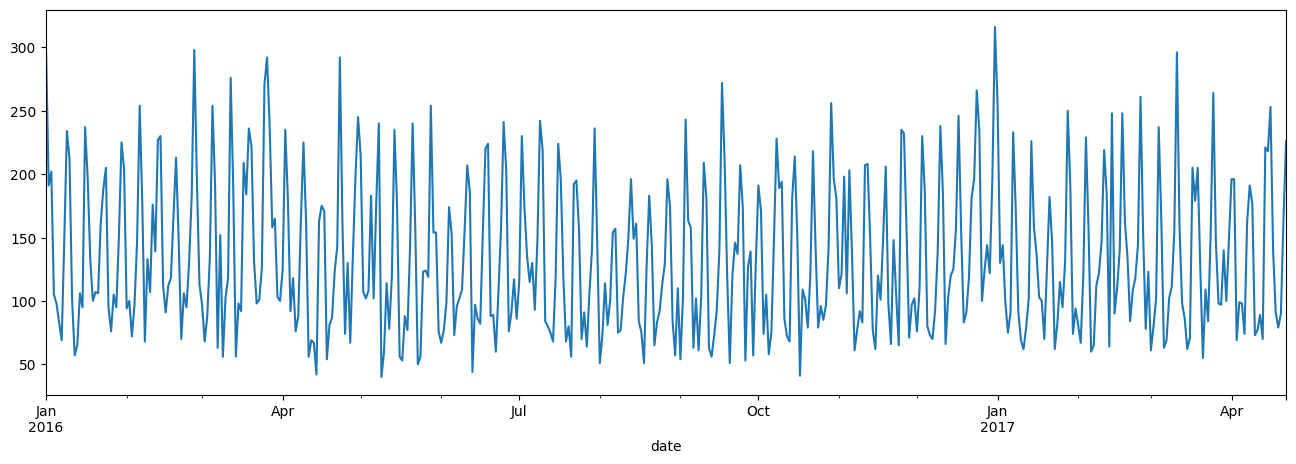

In [26]:
df1['total'].plot(figsize=(16,5))

In [34]:
df1.query('holiday==1').index
# df1[df1['holiday'] ==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

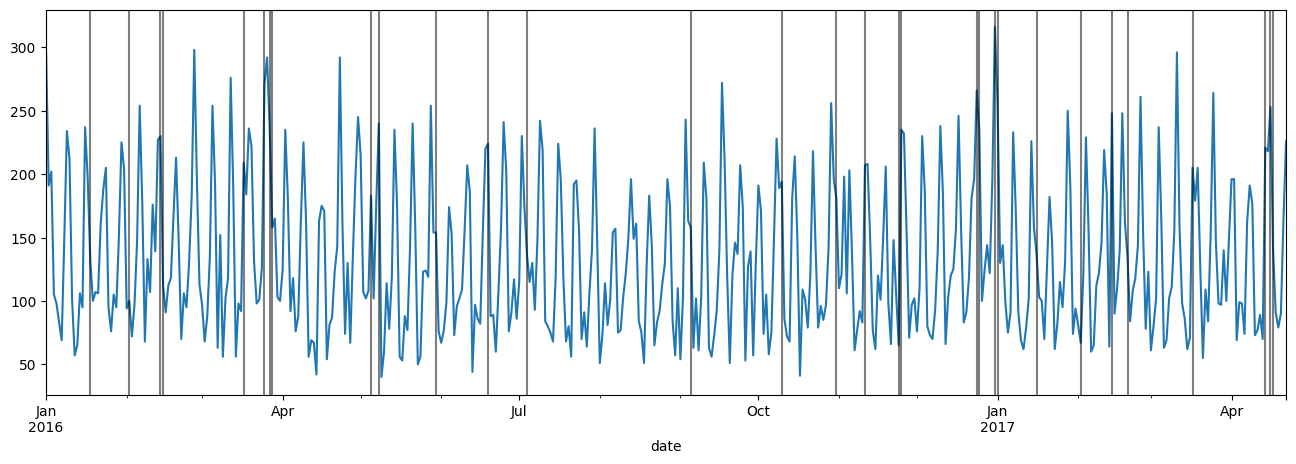

In [36]:
ax = df1['total'].plot(figsize=(16,5))
for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5);

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

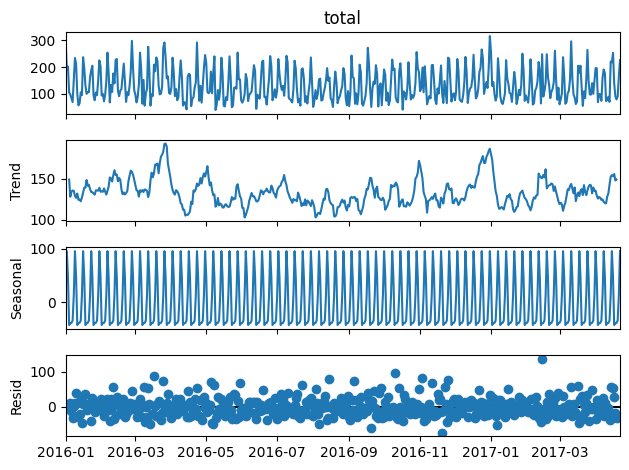

In [42]:
result = seasonal_decompose(df1['total'])
result.plot();

<Axes: xlabel='date'>

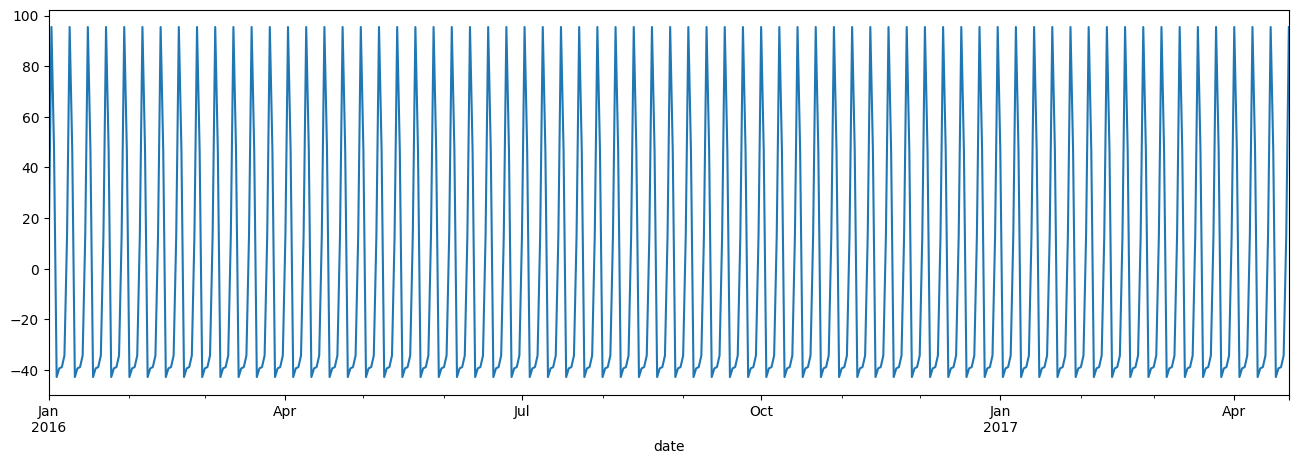

In [50]:
result.seasonal.plot(figsize=(16,5))

In [52]:
len(df1)

478

## On veut prédire 1 mois dans le furur donc le test sera d'environ 1 mois

In [55]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [61]:
from pmdarima import auto_arima

In [67]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2380.509
Date:                   Wed, 19 Mar 2025   AIC                           4769.018
Time:                           19:37:14   BIC                           4785.696
Sample:                       01-01-2016   HQIC                          4775.575
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4836      1.626      2.758      0.006       1.297       7.670
ar.S.L7        0.9677      0.012     83.458      0.000       0.945       0.990
ma.S.L7       -0.7610      0.048    -15.754      0.000      -0.856      -0.666
sigma2      1216.9917     71.283     17.073      0.000    1077.280    1356.704
===================================================================================
Ljung-Box (L1) (Q):                  15.38   Jarque-Bera (JB):                61.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
auto_arima(df1['total'], seasonal=True, m=7)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
model = SARIMAX(train['total'], order=[0,0,0], seasonal_order=[1,0,1,7], enforce_invertibility=False)

In [79]:
results = model.fit()

In [81]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Wed, 19 Mar 2025   AIC                           4336.738
Time:                           19:49:46   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.57e-05   1.05e+04      0.000       1.000       1.000
ma.S.L7       -0.9384      0.024    -39.207      0.000      -0.985      -0.891
sigma2      1111.8040     58.741     18.927      0.000     996.674    1226.934
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
start = len(train)
end = len(train) + len(test) -1

In [87]:
predictions = results.predict(start, end).rename('SARIMA Model')

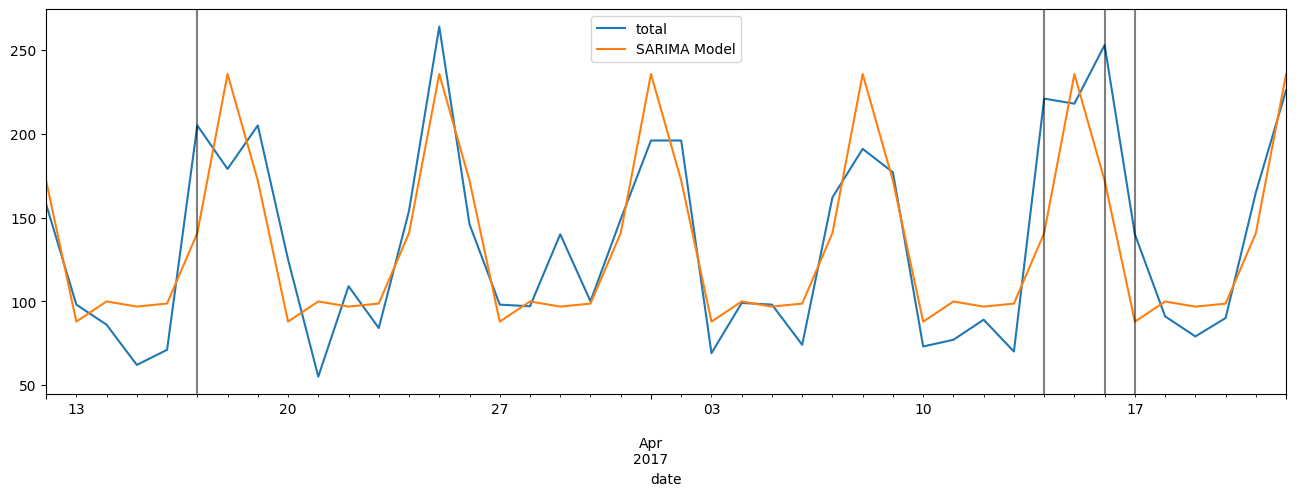

In [93]:
ax = test['total'].plot(legend=True, figsize=(16,5))
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5);

In [97]:
from statsmodels.tools.eval_measures import rmse

In [101]:
rmse(test['total'], predictions)

31.912427018888852

In [103]:
test['total'].mean()

134.26190476190476

# SARIMA avec facteurs exogènes

In [106]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


In [108]:
df1['holiday']

date
2016-01-01    1
2016-01-02    0
2016-01-03    0
2016-01-04    0
2016-01-05    0
             ..
2017-04-18    0
2017-04-19    0
2017-04-20    0
2017-04-21    0
2017-04-22    0
Freq: D, Name: holiday, Length: 478, dtype: int64

In [110]:
df1[['holiday']]

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2017-04-18,0
2017-04-19,0
2017-04-20,0


In [114]:
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2380.509
Date:                   Fri, 21 Mar 2025   AIC                           4769.018
Time:                           13:13:31   BIC                           4785.696
Sample:                       01-01-2016   HQIC                          4775.575
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4836      1.626      2.758      0.006       1.297       7.670
ar.S.L7        0.9677      0.012     83.458      0.000       0.945       0.990
ma.S.L7       -0.7610      0.048    -15.754      0.000      -0.856      -0.666
sigma2      1216.9917     71.283     17.073      0.000    1077.280    1356.704
===================================================================================
Ljung-Box (L1) (Q):                  15.38   Jarque-Bera (JB):                61.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train SARIMAX

In [129]:
model = SARIMAX(train['total'], exog=train[['holiday']] ,order=[0,0,0], seasonal_order=[1,0,1,7], enforce_invertibility=False)

In [131]:
result = model.fit()

In [133]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.580
Date:                   Fri, 21 Mar 2025   AIC                           4205.159
Time:                           13:21:48   BIC                           4221.470
Sample:                       01-01-2016   HQIC                          4211.596
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       70.0746      3.972     17.640      0.000      62.289      77.861
ar.S.L7        1.0000   4.72e-05   2.12e+04      0.000       1.000       1.000
ma.S.L7       -1.0463      0.024    -42.750      0.000      -1.094      -0.998
sigma2       739.3278     49.502     14.935      0.000     642.305     836.351
===================================================================================
Ljung-Box (L1) (Q):                  15.36   Jarque-Bera (JB):                21.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.23
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
start = len(train)
end = len(train) + len(test) -1

In [139]:
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with exog')

<Axes: xlabel='date'>

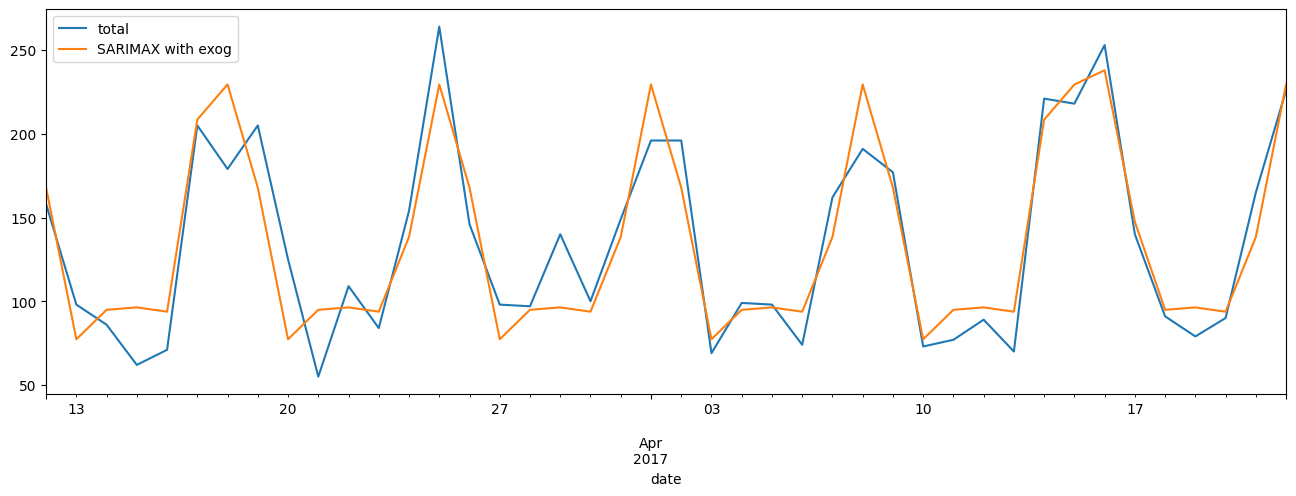

In [141]:
test['total'].plot(legend=True, figsize=(16,5))
predictions.plot(legend=True)

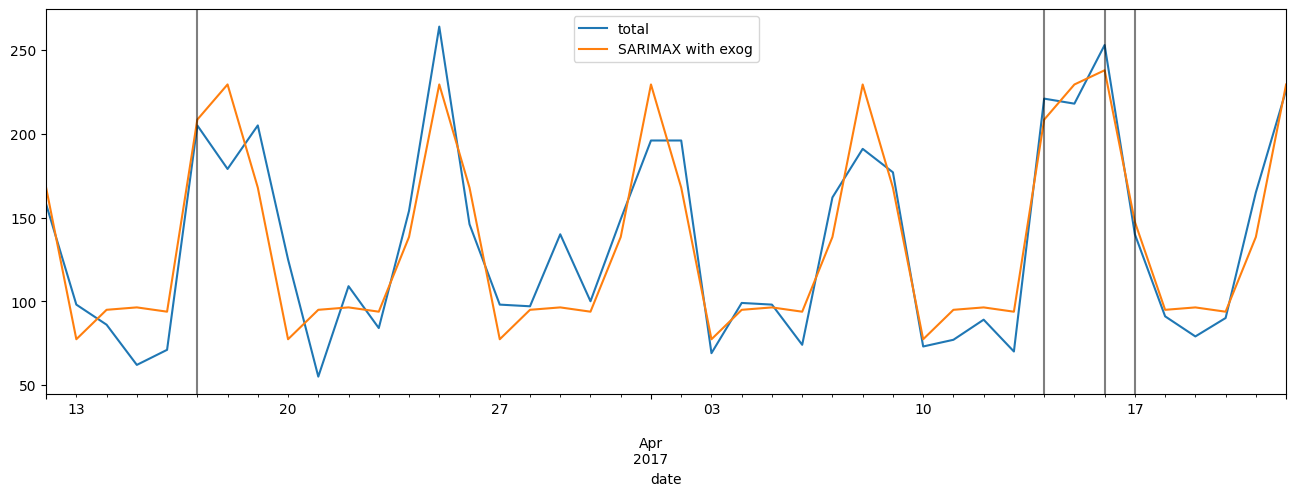

In [143]:
ax = test['total'].plot(legend=True, figsize=(16,5))
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5);

In [147]:
rmse(test['total'], predictions)

22.811709648544596

La rmse est meilleur que le modèle sans les facteurs exogènes

# Remplacement des valeurs manquantes dans df

In [152]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [155]:
df.isna().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

Il manque les 39 dernières données

In [214]:
df.tail(39)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-01,Monday,0,na,NaN,NaN,NaN,NaN,NaN


In [195]:
model = SARIMAX(df1['total'], exog=df1[['holiday']] ,order=[0,0,0], seasonal_order=[1,0,1,7], enforce_invertibility=False)

In [197]:
results = model.fit()

## Prévision grâce au facteur exogène (holiday)

In [200]:
len(df)

517

In [202]:
517 - 39

478

In [204]:
exog_forecast = df[478:][['holiday']]

In [206]:
forecast = results.predict(len(df1), len(df1) + 38, exog=exog_forecast).rename('Final SARIMAX FORECAST')

<Axes: xlabel='date'>

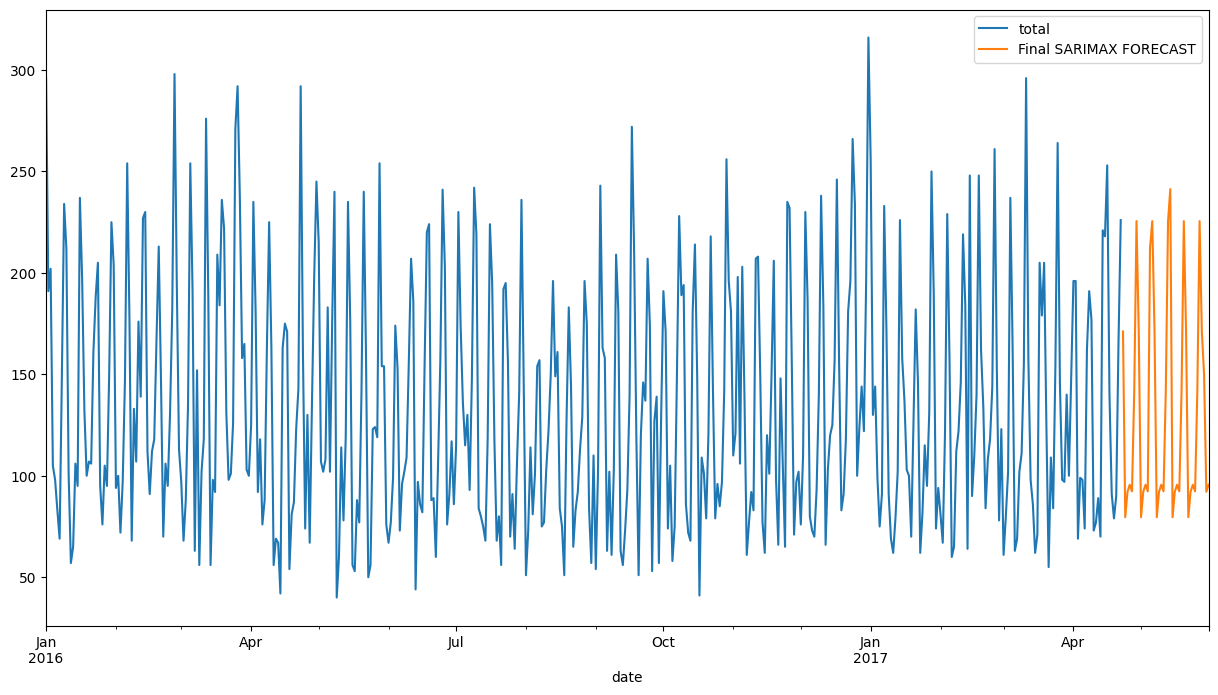

In [210]:
df1['total'].plot(figsize=(15,8), legend=True)
forecast.plot(legend=True)

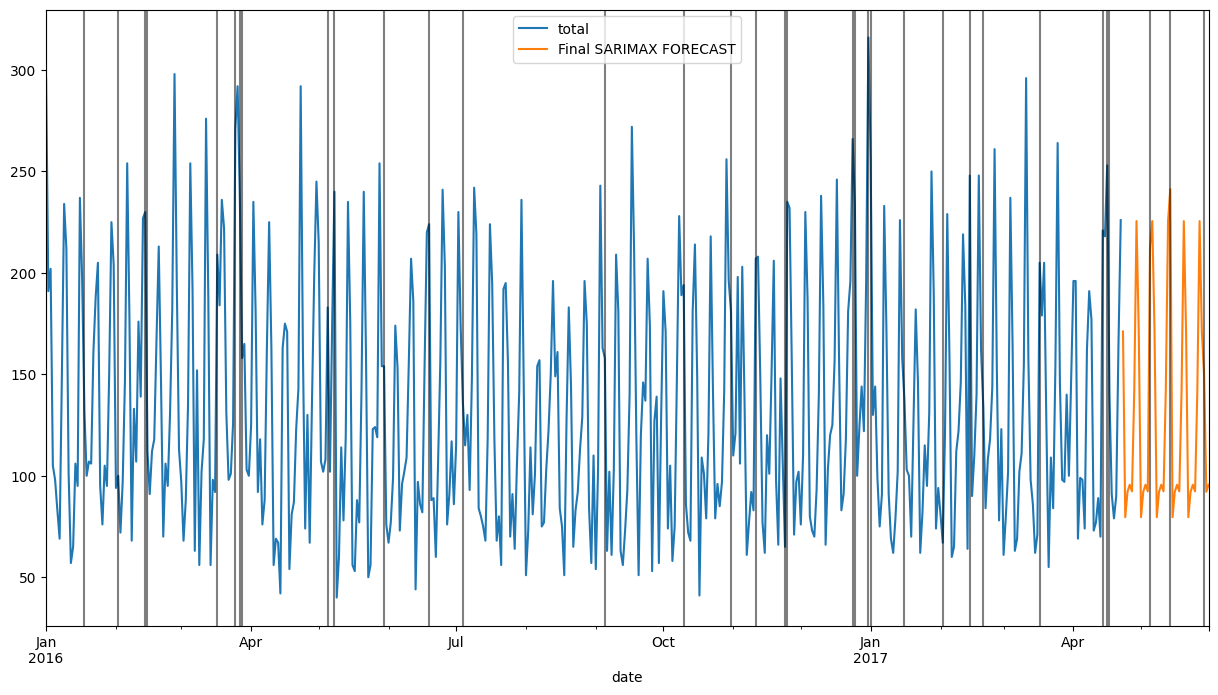

In [212]:
ax = df1['total'].plot(figsize=(15,8), legend=True)
forecast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5);

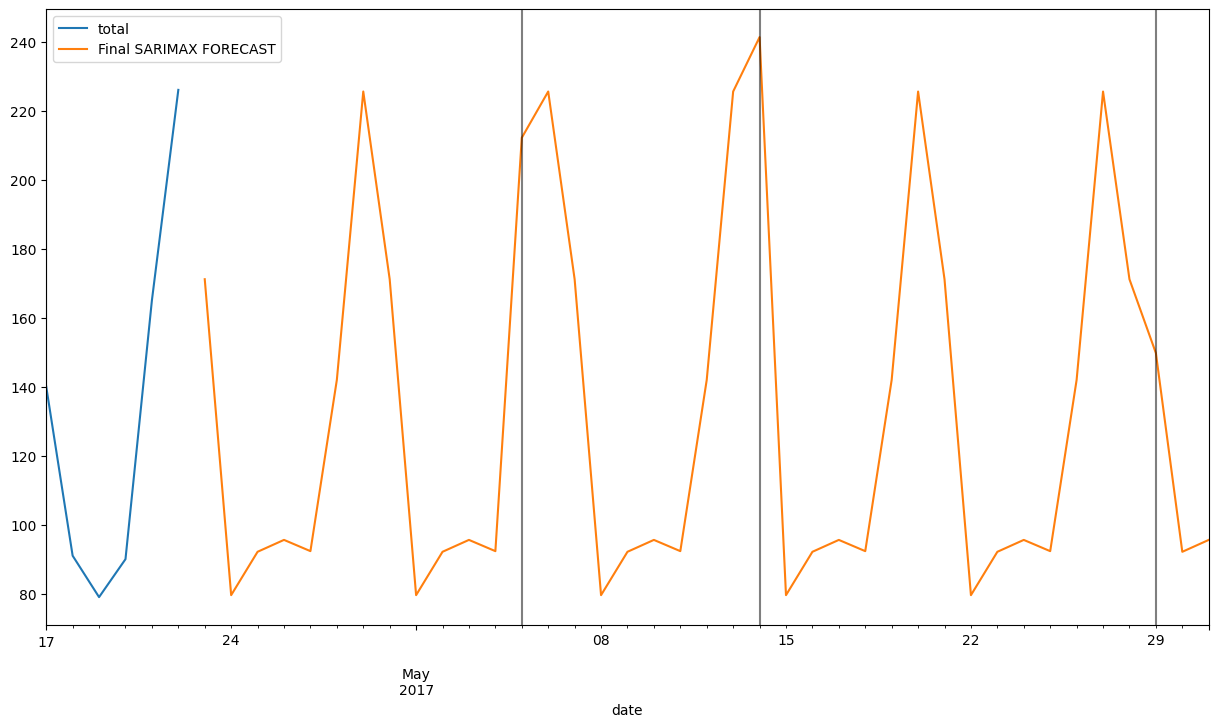

In [218]:
ax = df1['total'].loc['2017-04-17':].plot(figsize=(15,8), legend=True)
forecast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.5);

Les jours fériés correspondent aux pics des prévisiosn